<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/numerical_bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columnbs from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

  Age Sex Cancer Coronary_heart_disease Depression Smoked_100_cig Education
1  64   1      1                      1          2              1         8
2  37   2      2                      2          2              2         8
3  72   2      2                      2          2              2         5
4  84   2      2                      2          2              2         6
5  31   2      2                      2          2              1         8
6  81   2      1                      2          2              2         4
  Region Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1      3       4     74    235           8                3               108
2      3       3     69    218           9                3                 0
3      3       5     64    240           8                1                12
4     

In [7]:
# Loading in and or installing packages
library(dplyr)
install.packages("reshape2")
library(reshape2)
library(ggplot2)
install.packages('gridExtra')
library(gridExtra)
library(zip)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")

# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')
# Creating a copy of df
df_copy <- df

# Converting below columns in the df_copy dataframe to factors with original labels.
df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic.Strength` <- factor(df_copy$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))

### *Numerical Variables*

**Correlation Heatmap**

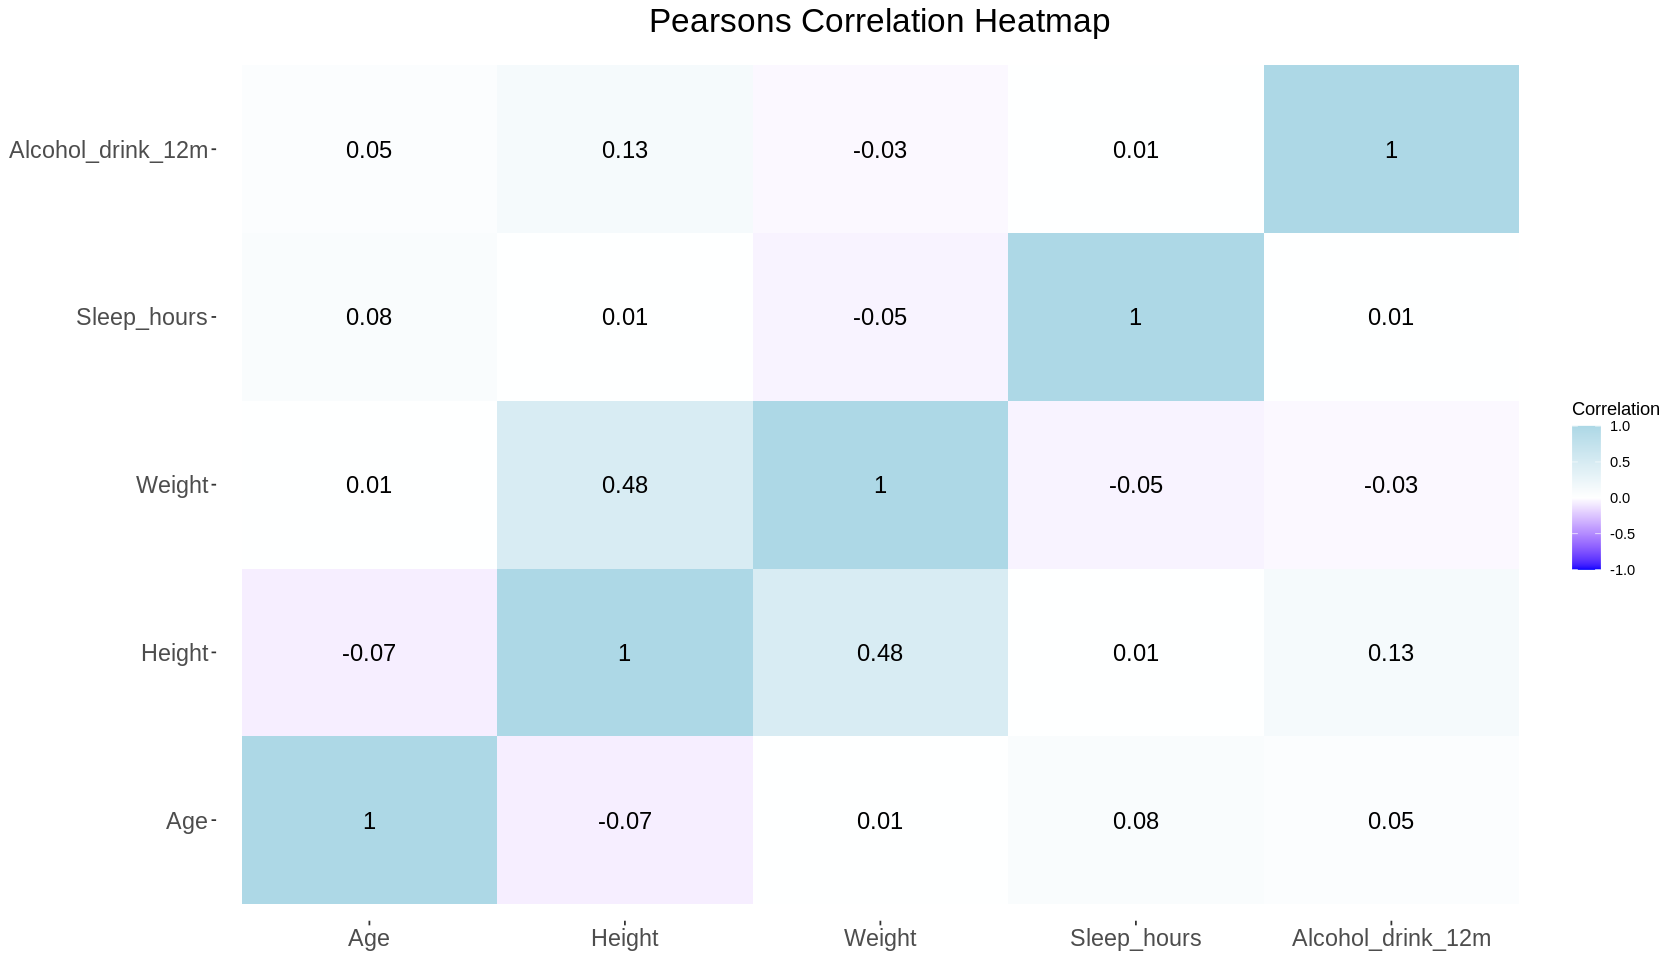

In [9]:
# Creating correlation matrix while rounding to two decimal places.
corr <- round(cor(df[,num_cols]),2)
# Melting the correlation matrix into a data frame with 3 columns.
melt_corr <- melt(corr)

# Set custom plot dimensions
options(repr.plot.width = 14, repr.plot.height = 8)
# Creating correlation heatmap based on melt_corr dataframe
ggplot(data = melt_corr, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  labs(title = 'Pearsons Correlation Heatmap') +
  # Creating text to showcase specific correlation value
  geom_text(aes(Var2, Var1, label = value), size = 5) +
  # Changing the gradient color
  scale_fill_gradient2(low = "blue", high = "lightblue",
                       limit = c(-1,1), name="Correlation") +
  # Changing the text size and color themes.
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        plot.title = element_text(size=20, hjust=0.5)
        )

Correlation coefficients that are positive indicate that as one variable increases, the other variable tends to increase. Correlation coefficients that are negative indicate that as one variable increases, the other variable tends to decrease. Correlation coefficients of 0 indicate that there isn't a linear relationship between the two variables, though there could still be a non-linear relationship, such as a quadratic one. The closer the positive correlation is to 1, or the negative correlation is to -1, the stronger the relationship between the two variables.
**Correlation doesn't mean causation however!!!**

* The strongest correlation occurs between Weight and Height with a 0.48 coefficient (still a mild correlation). This indicates that in our data, as height increases, weight tends to increase as well.

* The next strongest correlation occurs between Height and Alcohol consumption, with a 0.13 coefficient.

* Weight and height, sleep and height, and alcohol and sleep all had slightly positive coefficients, indicating that as one variable increases, the other might slightly increase. I found it surprising that an increase in alcohol consumption could lead to a slight increase in sleep based on the data.

* Variables with a slight negative correlation were sleep and weight, alcohol and weight, and age and height. This means that as one variable increases, the other may slightly decrease. Interestingly, our data suggests that increasing weight could lead to a decrease in the number of alcohol drinks consumed in the past 12 months. In theory, the number of drinks to reach the desired effects would need to increase if their weight increased.

---

**Scatterplots**

----------------------------------------------------------


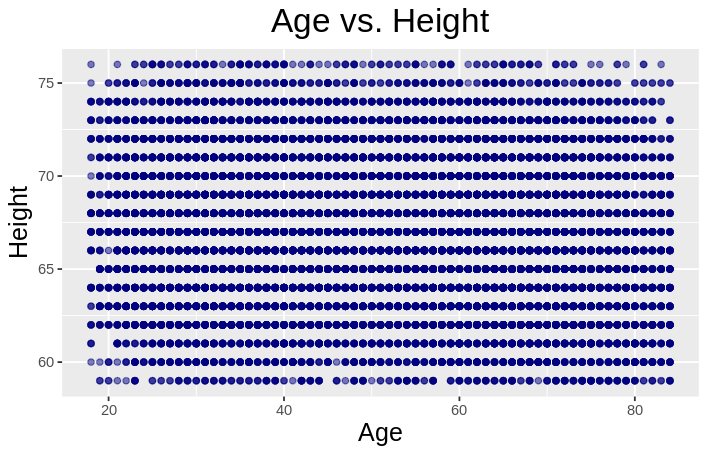

----------------------------------------------------------


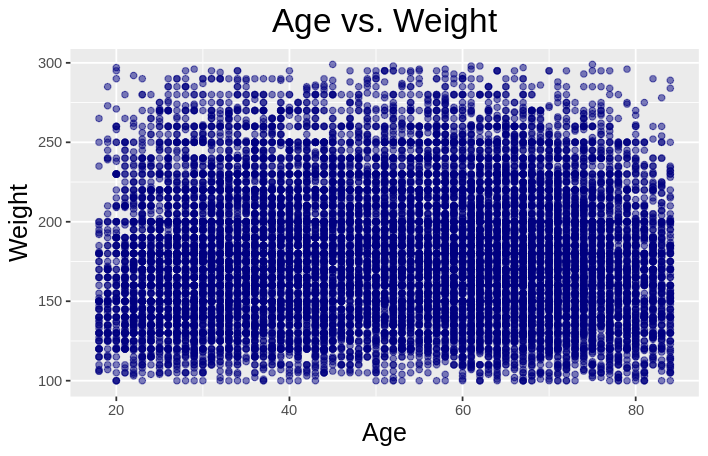

----------------------------------------------------------


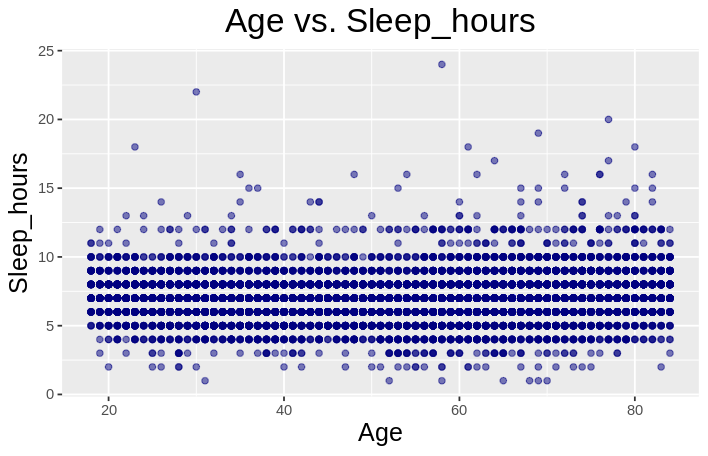

----------------------------------------------------------


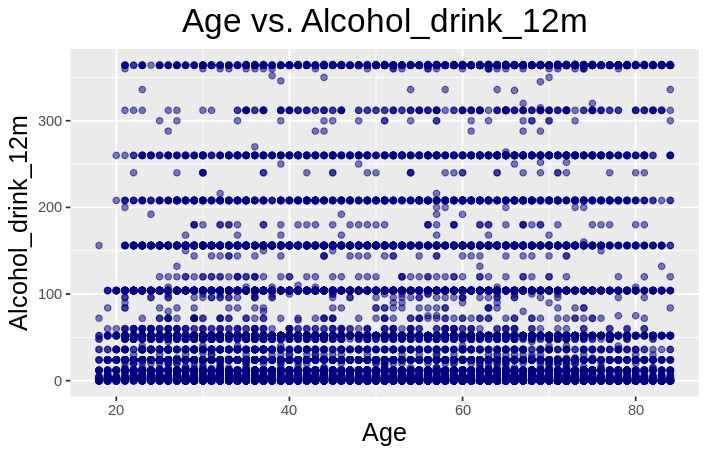

----------------------------------------------------------


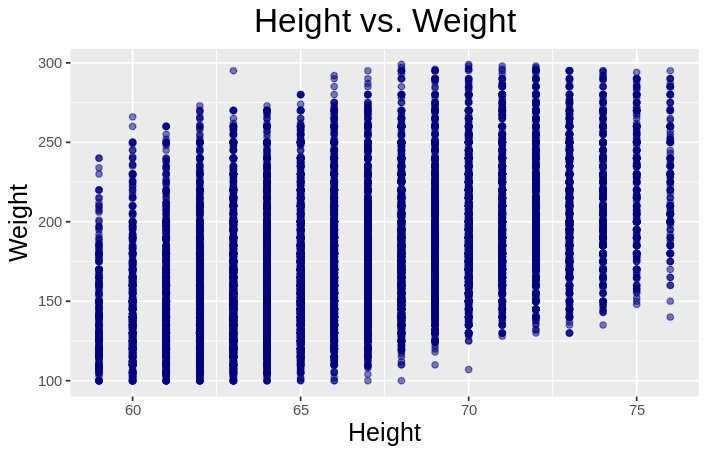

----------------------------------------------------------


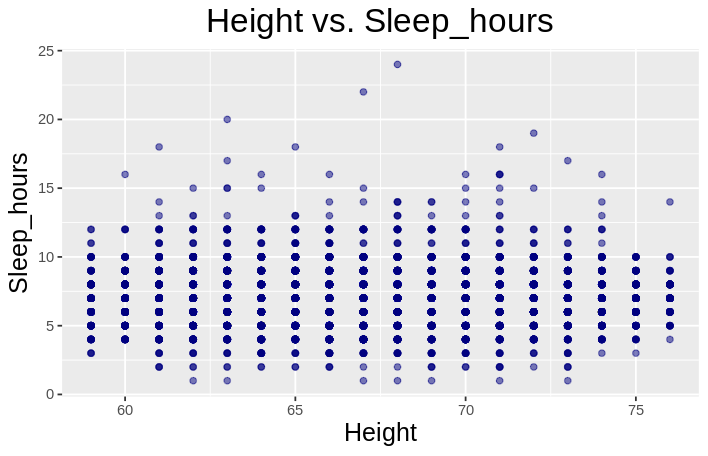

----------------------------------------------------------


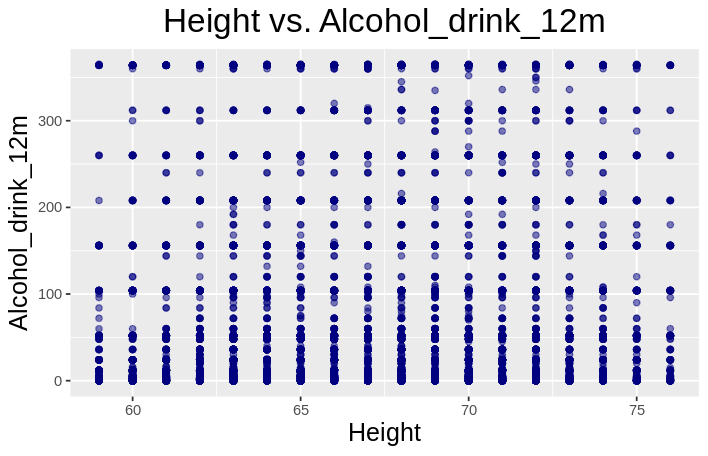

----------------------------------------------------------


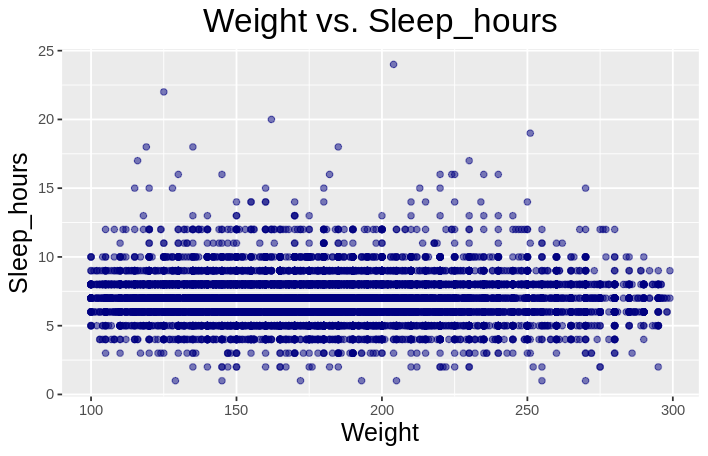

----------------------------------------------------------


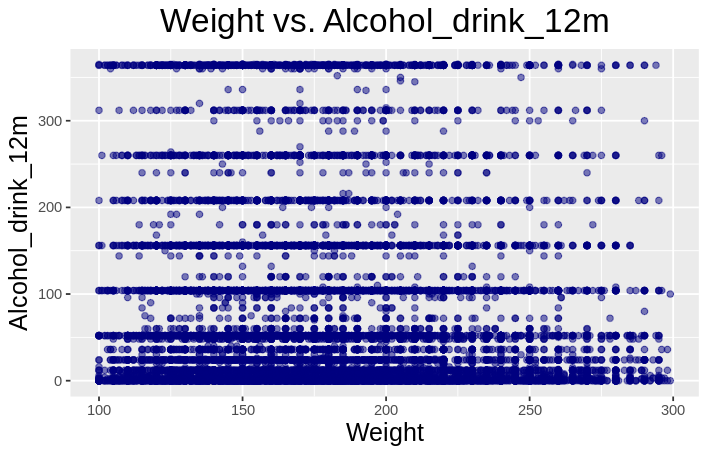

----------------------------------------------------------


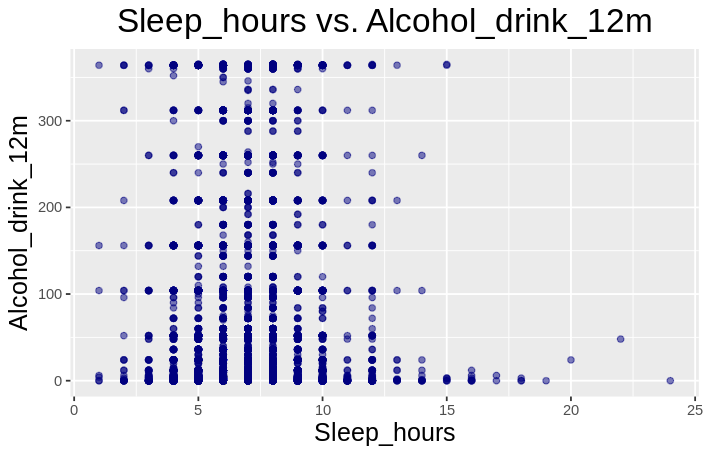

In [12]:
# Creating variable to hold different numerical variable combinations
num_cols_combination <- combn(num_cols, 2, simplify = FALSE)
# Setting up custom plot dimensions
options(repr.plot.width = 5.9, repr.plot.height = 3.8)
# Iterating through each value option in num_cols_combination
for (i in num_cols_combination) {
  # Extracting the first part of i as the x variable and the second part of i as the y variable
  x <- i[1]
  y <- i[2]

  # Creating a scatterplot
  g <- ggplot(df, aes(x = .data[[x]], y = .data[[y]])) +
        geom_point(alpha = 0.5, color = 'navy', size=1.5) +
        labs(title = paste(x,'vs.',y), x = x, y = y) +
        theme(plot.title = element_text(hjust = 0.5, size=20),
              axis.title.x = element_text(size=15),
              axis.title.y = element_text(size=15)
              )
  # Printing the scatterplot
  print(g)
  # Outputing a line to help separate the graphs
  cat('----------------------------------------------------------\n')
 }

There appears to be a positive correlation between height and weight, though it is relatively weak. Most of the other scatterplots do not show any noticeable indication of a relationship (which makes sense given the close to zero coefficients for the others).